In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, sys
from pathlib import Path
from tqdm import tqdm
from collections import defaultdict, Counter
import pickle
import pdb
import datetime
from glob import glob
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image as IImage


def show_dct(dct, n=3):
    return dict(list(dct.items())[:n])


pdata = Path('/data/utkface/')
p = Path('.')
from fastai import *
from fastai.vision import *

In [2]:
target = 'gender'

In [3]:
df = pd.read_csv('img2targets.csv', usecols=['img_name', target, 'is_train'])
# df = pd.read_csv('img2targets.csv', usecols=['img_name', target, 'is_train']).sample(1000)

classes = sorted(set(df[target]))

def get_dataset(df, classes=None):
    return ImageClassificationDataset(df.img_name, df[target], classes)

train_ds = get_dataset(df[df.is_train==1], classes)
valid_ds = get_dataset(df[df.is_train==0], classes)

def get_data(sz, bs):
    return ImageDataBunch.create(train_ds, valid_ds, path=p, bs=bs, size=sz,
                            ds_tfms=get_transforms()).normalize(imagenet_stats)

In [ ]:
data = get_data(sz=200, bs=64)

i = np.random.choice(len(data.valid_ds))
img,label = data.valid_ds[i]

# img.show(title=" ".join(np.array(data.classes)[np.where(labels)[0]]))
img.show(title=classes[label])

In [5]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [6]:
def train_size(sz, bs, lr):
    learn.data=get_data(sz, bs)
    learn.freeze()
    learn.fit_one_cycle(5, slice(lr))
    learn.unfreeze()
    learn.fit_one_cycle(5, slice(lr/20, lr/2), pct_start=0.1)
    learn.save(f"{target}-{sz}")

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


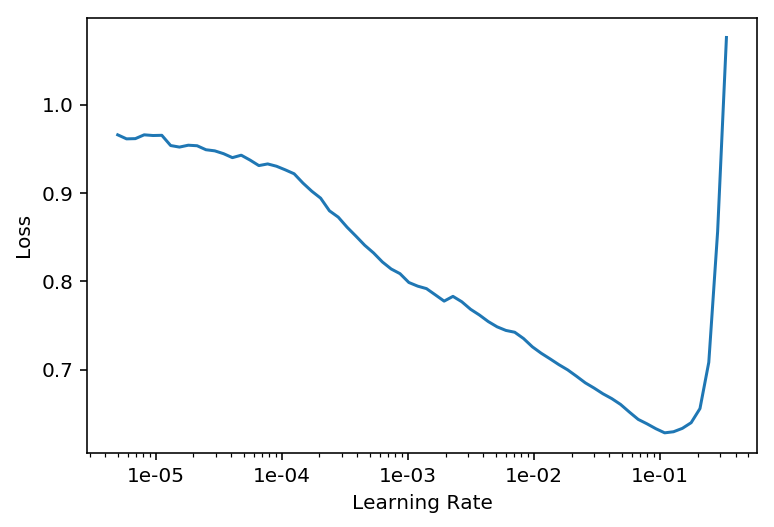

In [7]:
sz, bs = 200, 128 

learn.data=get_data(sz, bs)

learn.lr_find(start_lr=1e-6)
learn.recorder.plot()

In [8]:
lr=1e-3

In [9]:
train_size(sz, bs, lr)

Total time: 04:57
epoch  train_loss  valid_loss  accuracy
1      0.227771    0.230799    0.917371  (01:00)
2      0.193589    0.179561    0.929205  (00:59)
3      0.160449    0.170073    0.935757  (01:00)
4      0.114996    0.161387    0.939983  (00:59)
5      0.083778    0.162796    0.939772  (00:58)

